In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df_theme = pd.read_csv('../data/processed/review_topics_and_sentiment.csv')
df_sentiment = pd.read_csv('../data/processed/processed_bank_app_reviews_with_sentiment.csv')

In [7]:
df_sentiment

,Unnamed: 0.1,Unnamed: 0,review,rating,date,bank,source,distilbert_sentiment,distilbert_label,distilbert_score,vader_sentiment,textblob_sentiment,distilbert_numerical
0,0,0,20 years,5,2025-06-08,Commercial Bank of Ethiopia (CBE),Google Play Store,"{'sentiment_distilbert': 'POSITIVE', 'score_di...",POSITIVE,0.991589,neutral,neutral,1
1,1,1,A great app. It's like carrying a bank in your...,4,2025-06-07,Commercial Bank of Ethiopia (CBE),Google Play Store,"{'sentiment_distilbert': 'POSITIVE', 'score_di...",POSITIVE,0.999293,positive,positive,1
2,2,2,More than garrantty bank EBC.,4,2025-06-07,Commercial Bank of Ethiopia (CBE),Google Play Store,"{'sentiment_distilbert': 'POSITIVE', 'score_di...",POSITIVE,0.997196,neutral,positive,1
3,3,3,really am happy to this app it is Siple to use...,5,2025-06-07,Commercial Bank of Ethiopia (CBE),Google Play Store,"{'sentiment_distilbert': 'POSITIVE', 'score_di...",POSITIVE,0.998870,positive,positive,1
4,4,4,I liked this app. But the User interface is ve...,2,2025-06-07,Commercial Bank of Ethiopia (CBE),Google Play Store,"{'sentiment_distilbert': 'NEGATIVE', 'score_di...",NEGATIVE,0.999684,negative,positive,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,1195,Wow,5,2025-01-17,Dashen Bank,Google Play Store,"{'sentiment_distilbert': 'POSITIVE', 'score_di...",POSITIVE,0.999592,positive,positive,1
1196,1196,1196,Dashen yichalal. Ewnetem one step a head,5,2025-01-17,Dashen Bank,Google Play Store,"{'sentiment_distilbert': 'NEGATIVE', 'score_di...",NEGATIVE,0.983263,neutral,neutral,-1
1197,1197,1197,It has a Good performance but need more upgrad...,4,2025-01-17,Dashen Bank,Google Play Store,"{'sentiment_distilbert': 'POSITIVE', 'score_di...",POSITIVE,0.996793,positive,positive,1
1198,1198,1198,It is a very wonderful work that has saved its...,5,2025-01-17,Dashen Bank,Google Play Store,"{'sentiment_distilbert': 'POSITIVE', 'score_di...",POSITIVE,0.999881,positive,positive,1


C:\Users\user\AppData\Local\Temp\ipykernel_23176\3134656672.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


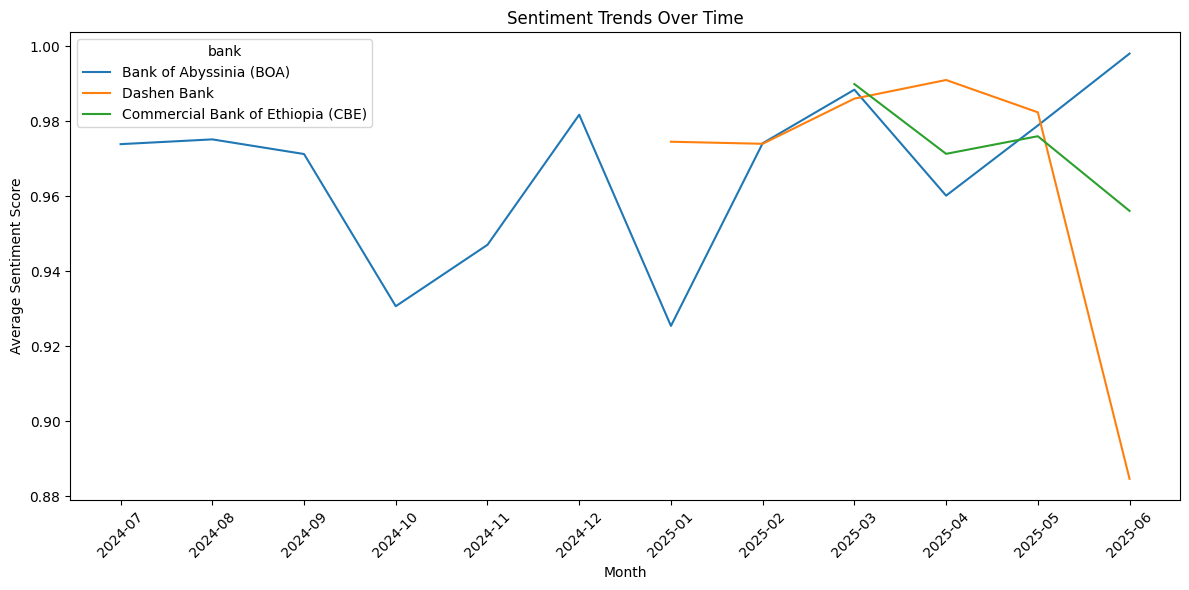

In [ ]:
# 1. Sentiment Trends Over Time
plt.figure(figsize=(12, 6))
# Ensure 'date' column is in datetime format and sort by date
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])
df_sentiment.sort_values('date', inplace=True)
sns.lineplot(
    data=df_sentiment,
    x=df_sentiment['date'].dt.to_period('M').astype(str),
    y='distilbert_score',
    hue='bank',
    ci=None
)
plt.title('Sentiment Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

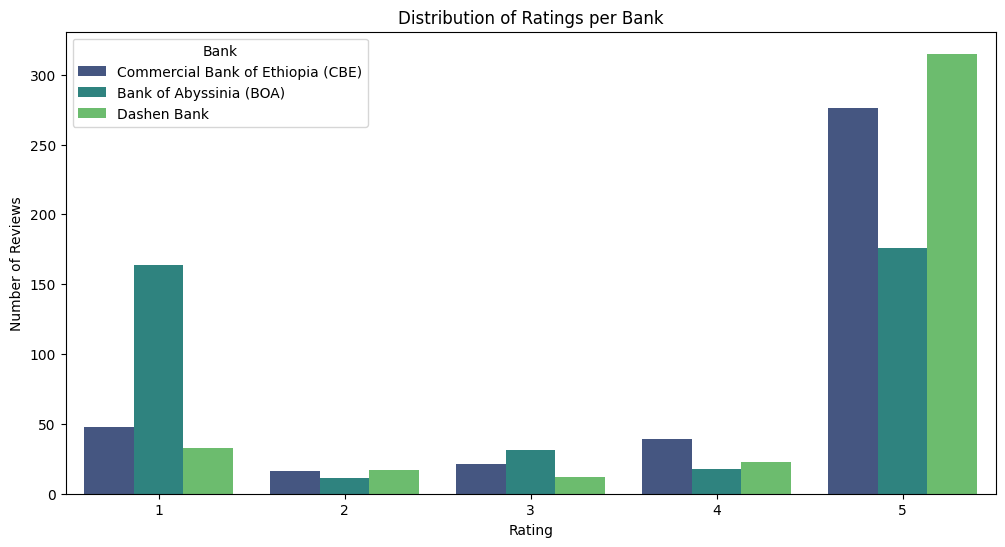

In [ ]:
# 2. Rating distribution per bank

plt.figure(figsize=(12, 6))
sns.countplot(data=df_sentiment, x='rating', hue='bank', palette='viridis')
plt.title('Distribution of Ratings per Bank')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.legend(title='Bank')
plt.show()

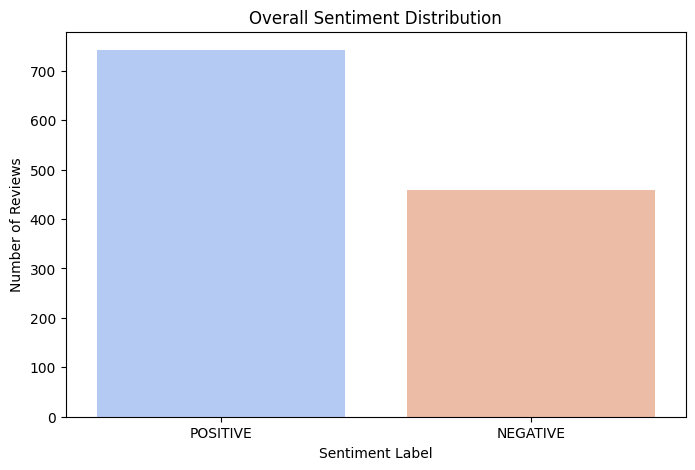

In [ ]:
# 3. Overall Sentiment Distribution

plt.figure(figsize=(8, 5))
sns.countplot(data=df_theme, x='sentiment_label', order=['POSITIVE', 'NEGATIVE'], palette='coolwarm', hue='sentiment_label')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Reviews')
plt.show()

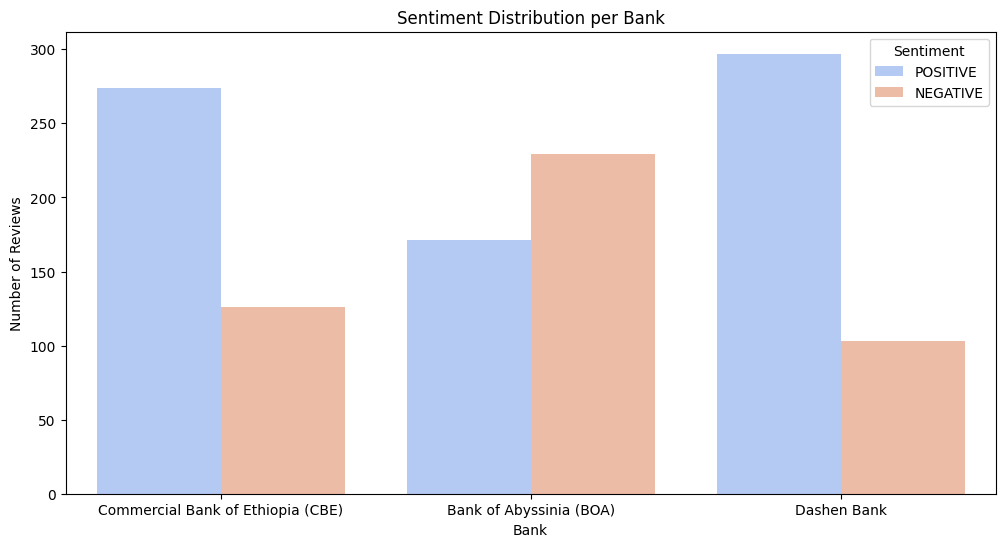

In [ ]:
# 4. Sentiment Distribution per Bank

plt.figure(figsize=(12, 6))
sns.countplot(data=df_sentiment, x='bank', hue='distilbert_label', palette='coolwarm')
plt.title('Sentiment Distribution per Bank')
plt.xlabel('Bank')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.show()